In [1]:
# Making the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_data = pd.read_csv("/content/sample_data/cleaned_data.csv")

In [4]:
#remove nan values
train_data = train_data.dropna()

In [7]:
train_data['score'] = train_data['score'].map({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})

In [8]:
# number of O and 1 values
train_data['score'].value_counts()

0.0    16451
1.0     5741
Name: score, dtype: int64

In [9]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [10]:
train_data.set_index('date', inplace=True)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 154497 entries, 2000-01-04 to 2003-01-14
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   154497 non-null  int64  
 1   fips         154497 non-null  int64  
 2   PRECTOT      154497 non-null  float64
 3   PS           154497 non-null  float64
 4   QV2M         154497 non-null  float64
 5   T2M          154497 non-null  float64
 6   T2MDEW       154497 non-null  float64
 7   T2MWET       154497 non-null  float64
 8   T2M_MAX      154497 non-null  float64
 9   T2M_MIN      154497 non-null  float64
 10  T2M_RANGE    154497 non-null  float64
 11  TS           154497 non-null  float64
 12  WS10M        154497 non-null  float64
 13  WS10M_MAX    154497 non-null  float64
 14  WS10M_MIN    154497 non-null  float64
 15  WS10M_RANGE  154497 non-null  float64
 16  WS50M        154497 non-null  float64
 17  WS50M_MAX    154497 non-null  float64
 18  WS50M_MI

In [12]:
train_data.head

<bound method NDFrame.head of             Unnamed: 0  fips  PRECTOT  ...  WS50M_MIN  WS50M_RANGE  score
date                                   ...                               
2000-01-04           3  1001    15.95  ...       3.74         5.58    0.0
2000-01-11          10  1001     1.33  ...       1.71         4.67    NaN
2000-01-18          17  1001     1.11  ...       3.84         2.55    NaN
2000-01-25          24  1001     0.00  ...       3.96         4.07    NaN
2000-02-01          31  1001     0.00  ...       1.27         5.11    NaN
...                ...   ...      ...  ...        ...          ...    ...
2002-12-17     1081621  6035     3.50  ...       2.58         4.27    NaN
2002-12-24     1081628  6035     0.66  ...       1.42         3.46    0.0
2002-12-31     1081635  6035     8.94  ...       1.09        11.87    NaN
2003-01-07     1081642  6035     0.00  ...       4.41         3.33    NaN
2003-01-14     1081649  6035     3.72  ...       1.79         2.56    NaN

[154497

In [14]:
train_new = train_data

In [24]:
# As Arima model took lot of time to work on 19Million data built it using 1 % of data
df_train = train_new.sample(frac = 0.01)
df_train.drop('Unnamed: 0', axis =1, inplace = True)

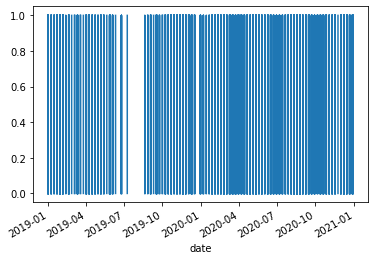

In [18]:
df_train['score'].plot()

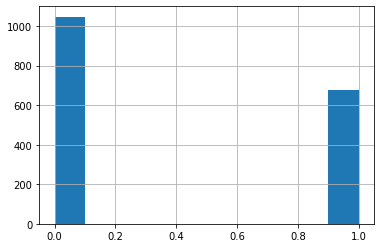

In [ ]:
# Data distribution of the score variable
df_train['score'].hist()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.score   No. Observations:                  227
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -138.928
Method:                       css-mle   S.D. of innovations              0.445
Date:                Sat, 18 Dec 2021   AIC                            291.855
Time:                        06:20:51   BIC                            315.830
Sample:                             1   HQIC                           301.529
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.008      0.014      0.989      -0.016       0.016
ar.L1.D.score    -0.9089      0.066    -13.672      0.000      -1.039      -0.779
ar.L2.D.score    -0.7638      0.087     

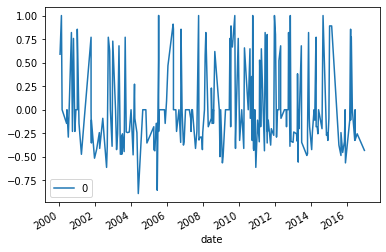

                0
count  227.000000
mean     0.002949
std      0.449045
min     -0.890229
25%     -0.323878
50%     -0.110586
75%     -0.000407
max      0.999890


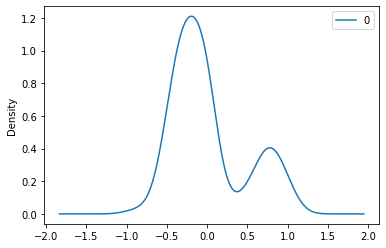

In [21]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

series = df_train['score'].dropna()
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
# pyplot.show()
# summary stats of residuals
print(residuals.describe())

Test RMSE: 0.577


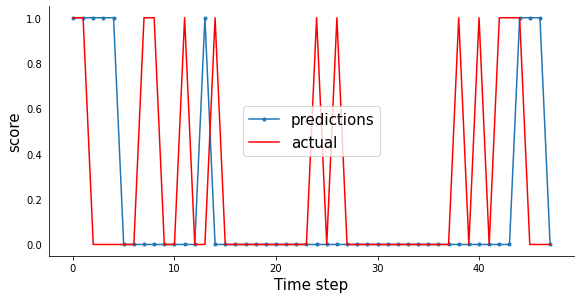

In [35]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = df_train['score'].dropna()
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = np.round(abs(output[0]))
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

aa=[x for x in range(48)]
plt.figure(figsize=(8,4))
plt.plot(aa, predictions[0:48], marker='.', label="predictions")
plt.plot(aa, test[0:48], 'r', label="actual")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('score', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [28]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test, predictions))

0.3333333333333333


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(test, predictions)

0.6666666666666666

In [30]:
from sklearn.metrics import recall_score
recall_score(test, predictions, average='weighted')

0.6666666666666666

In [31]:
from sklearn.metrics import f1_score
f1_score(test, predictions, average='weighted')

0.6453726453726454

In [32]:
from sklearn.metrics import precision_score
precision_score(test, predictions, average='weighted')

0.6324786324786325